In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [2]:
# read in the data
df = pd.read_feather("../preprocessed_data/taxi_add_weather_19.feather").drop('index', axis=1)
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,DATE,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,151,239,7.0,1.65,9.95,...,2019-01-01,0.00,0.06,0.0,0.0,58,39,0.0,1,False
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,239,246,14.0,1.00,16.30,...,2019-01-01,0.00,0.06,0.0,0.0,58,39,0.0,1,False
2,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.30,1.0,163,229,6.5,1.25,9.05,...,2019-01-01,0.00,0.06,0.0,0.0,58,39,0.0,1,False
3,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.70,1.0,229,7,13.5,3.70,18.50,...,2019-01-01,0.00,0.06,0.0,0.0,58,39,0.0,1,False
4,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.10,1.0,141,234,10.0,1.70,13.00,...,2019-01-01,0.00,0.06,0.0,0.0,58,39,0.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19350141,2019-10-31 23:02:44,2019-10-31 23:12:38,1.0,7.27,2.0,56,170,52.0,4.00,65.42,...,2019-10-31,5.14,0.54,0.0,0.0,71,60,0.0,3,False
19350142,2019-10-31 23:39:40,2019-11-01 00:06:07,1.0,16.43,2.0,132,170,52.0,0.00,55.30,...,2019-10-31,5.14,0.54,0.0,0.0,71,60,0.0,3,False
19350143,2019-10-31 23:36:36,2019-11-01 00:10:47,1.0,18.30,2.0,132,148,52.0,11.06,66.36,...,2019-10-31,5.14,0.54,0.0,0.0,71,60,0.0,3,False
19350144,2019-10-31 23:05:41,2019-10-31 23:37:52,1.0,18.34,2.0,132,262,52.0,0.00,61.42,...,2019-10-31,5.14,0.54,0.0,0.0,71,60,0.0,3,False


In [3]:
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["hour"] = df["tpep_pickup_datetime"].dt.hour
df["mean_temp"] = (df["Max_temp"]+df["Min_temp"])/2

In [4]:
df.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime            object
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
fare_amount                     float64
tip_amount                      float64
total_amount                    float64
time_used                       float64
avg_speed                       float64
final_amount                    float64
DATE                     datetime64[ns]
avg_wind_speed                  float64
Rainfall                        float64
SNOW                            float64
Snow_depth                      float64
Max_temp                          int64
Min_temp                          int64
Thunder                         float64
WEEKDAY                           int64
weekend                            bool
hour                              int64
mean_temp                       float64


# Feature selection

In [5]:
abs(df.corr()["tip_amount"])

passenger_count    0.001526
trip_distance      0.566172
RatecodeID         0.388398
PULocationID       0.025797
DOLocationID       0.023895
fare_amount        0.584584
tip_amount         1.000000
total_amount       0.721397
time_used          0.503813
avg_speed          0.305130
final_amount       0.720971
avg_wind_speed     0.039039
Rainfall           0.012010
SNOW               0.013037
Snow_depth         0.003216
Max_temp           0.045506
Min_temp           0.049547
Thunder            0.018523
WEEKDAY            0.023928
weekend            0.030851
hour               0.027795
mean_temp          0.047887
Name: tip_amount, dtype: float64

In [6]:
X = df[['trip_distance',"fare_amount","total_amount","time_used","avg_speed","avg_wind_speed","Rainfall","SNOW","mean_temp","WEEKDAY","hour"]]

In [7]:
X

,trip_distance,fare_amount,total_amount,time_used,avg_speed,avg_wind_speed,Rainfall,SNOW,mean_temp,WEEKDAY,hour
0,1.50,7.0,9.95,6.666667,13.500000,0.00,0.06,0.0,48.5,1,0
1,2.60,14.0,16.30,19.200000,8.125000,0.00,0.06,0.0,48.5,1,0
2,1.30,6.5,9.05,7.150000,10.909091,0.00,0.06,0.0,48.5,1,0
3,3.70,13.5,18.50,13.633333,16.283619,0.00,0.06,0.0,48.5,1,0
4,2.10,10.0,13.00,12.000000,10.500000,0.00,0.06,0.0,48.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
19350141,7.27,52.0,65.42,9.900000,44.060606,5.14,0.54,0.0,65.5,3,23
19350142,16.43,52.0,55.30,26.450000,37.270321,5.14,0.54,0.0,65.5,3,23
19350143,18.30,52.0,66.36,34.183333,32.120917,5.14,0.54,0.0,65.5,3,23
19350144,18.34,52.0,61.42,32.183333,34.191611,5.14,0.54,0.0,65.5,3,23


In [8]:
Y = df[["tip_amount"]]
Y

,tip_amount
0,1.65
1,1.00
2,1.25
3,3.70
4,1.70
...,...
19350141,4.00
19350142,0.00
19350143,11.06
19350144,0.00


## Normalization

In [9]:
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

# split the data into training and testing

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 66)

# linear regression



In [11]:
linearg = LinearRegression()
linearg.fit(x_train,y_train)
y_result = linearg.predict(x_test)
print(x_train.size)
print(y_train.size)
print(x_test.size)
print(y_result.size)
print(y_test.size)

170281276
15480116
42570330
3870030
3870030


In [12]:
print(linearg.coef_)

[[-9.36868503e+00 -2.79808611e+01  9.65379024e+01  4.67138973e+00
   2.44423078e+00 -5.23189412e-01 -3.98410368e-03 -2.24948330e-01
  -1.18462954e+00  1.66498298e-01 -2.41253426e-01]]


In [13]:
print(linearg.intercept_)

[0.1028207]


In [14]:
# score the model
r2_score(y_test,y_result)

0.7846006041870737

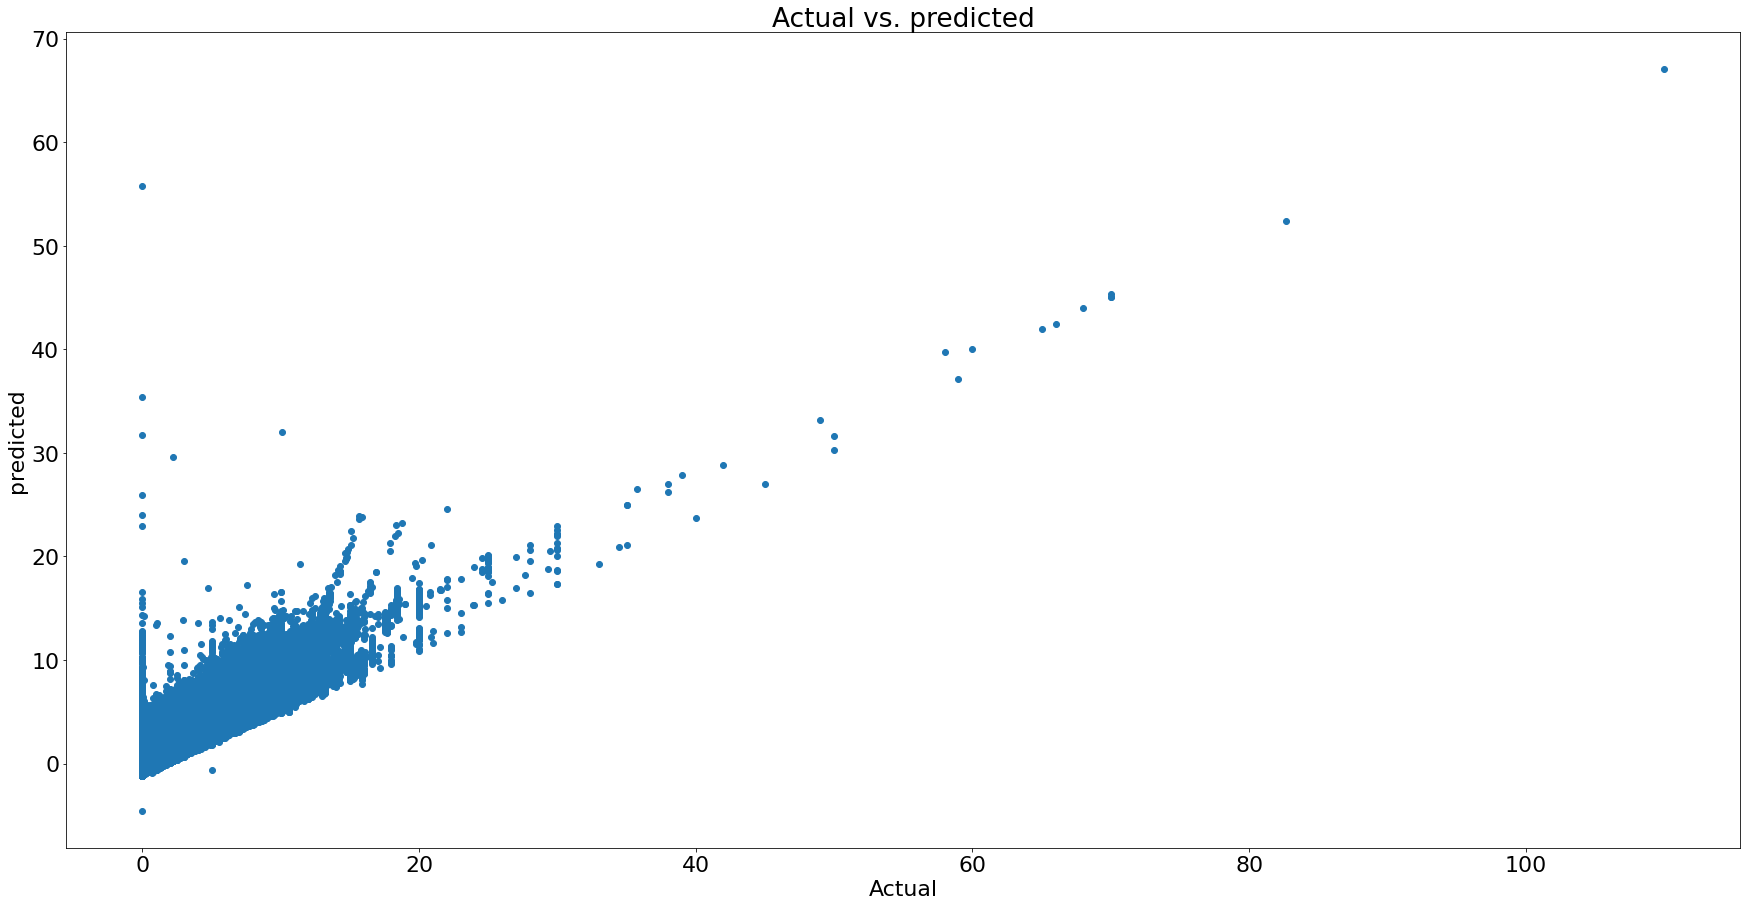

In [17]:
plt.figure(figsize = (30,15))
plt.rcParams.update({'font.size': 22})
plt.scatter(y_test,y_result)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title("Actual vs. predicted")
plt.show()

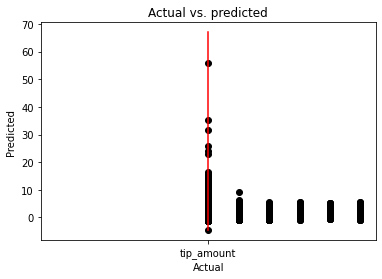

In [16]:
%matplotlib inline

plt.scatter(y_test,y_result,color = "black")

x0 = min(y_test)
x1 = max(y_test)
y0 = min(y_result)
y1 = max(y_result)
plt.plot([x0,x1],[y0,y1],color="red")

plt.xlabel("Actual")
plt.ylabel("Predicted ")
plt.title("Actual vs. predicted")
plt.show()